## Part 1. Gaussian quadrature

The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives *exact* value for the integral.

For example, let's calculate the following integral:
$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function *roots_legendre* immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).


### Task 1.1
(20% of the grade)

1. Calculate the exact value of the integral ([1](#mjx-eqn-eq1)) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

In [5]:
I_real = 2 / 3

2. Calculate the value of the integral ([1](#mjx-eqn-eq1)) using the usual method of numerical integration on a uniform grid (for example, implemented by you in week_6_calculus homework). Estimate the number of nodes needed to achieve relative accuracy $10^{-10}$.

In [46]:
def midpoint_rule(func, a, b, eps):
    import numpy as np
    I_0 = np.inf
    converged = False
    n = 1
    
    while ~converged:
        step = (b - a) / n
        points = np.arange(a + step / 2, b, step)
        I = step * np.sum([func(point) for point in points])

        converged = (np.abs(I - I_0) < eps)
        I_0 = I
        n *= 2
        
    return (I, n / 2)

f = lambda x: 7*x**3 - 8*x**2 - 2*x + 3
res = midpoint_rule(f, -1, 1, 1e-10)
print('Estimation: %.10f\nNumber of intervals: %i' % res)
print('Real answer: %.10f' % I_real)

Estimation: 0.6666666667
Number of intervals: 524288
Real answer: 14713.3333333333


3. Calculate the integral ([1](#mjx-eqn-eq1)) using the roots of the Legendre polynomial from 1 to 6 degrees as nodes (to get roots and weigths use scipy.special.roots_legendre)

In [47]:
from scipy.special import roots_legendre
for n in range(1, 7):
    nodes, weights = roots_legendre(n)
    print('Estimation: %.10f\nNumber of nodes: %i\n--------------------------' % (sum(weights * f(nodes)), n))

Estimation: 6.0000000000
Number of nodes: 1
--------------------------
Estimation: 0.6666666667
Number of nodes: 2
--------------------------
Estimation: 0.6666666667
Number of nodes: 3
--------------------------
Estimation: 0.6666666667
Number of nodes: 4
--------------------------
Estimation: 0.6666666667
Number of nodes: 5
--------------------------
Estimation: 0.6666666667
Number of nodes: 6
--------------------------


Compare the number of nodes needed to obtain the same accuracy in both numerical methods.

It is easy to see, that the number of the nodes is tremendously lower in the second method. That's the result of corretaion between polynomials in the integral and Legendre ones.

### Task 1.2
(20% of the grade)

Calculate the value of the same integral, but on the interval from 0 to 10.
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Please note that you can no longer directly use Legendre polynomials, because they are defined for the interval (-1,1). But you can always make an *affine transformation* (a transformation that does not change the area) in order to go to the desired coordinate system.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx = 5\int_{0}^{2} (875 x^3 - 200 x^2 - 15 x + 3) dx = 5\int_{-1}^{1} (875 (x + 1)^3 - 200 (x + 1)^2 - 15 (x + 1) + 3) dx = 5\int_{-1}^{1} (875 x^3 + 2425 x^2 + 2210 x + 663) dx
$$

In [48]:
I_real = 44140 / 3
print('Real answer: %.10f\n--------------------------' % I_real)

f = lambda x: 5 * (875*x**3 + 2425*x**2 + 2210*x + 663)
eps = 1e-10
n = 1
accuracy = False
while ~accuracy:
    nodes, weights = roots_legendre(n)
    I = sum(weights * f(nodes))
    print('Estimation: %.10f\nNumber of nodes: %i\n--------------------------' % (I, n))
    accuracy = (eps > abs(I_real - I))
    n += 1

Real answer: 14713.3333333333
--------------------------
Estimation: 6630.0000000000
Number of nodes: 1
--------------------------
Estimation: 14713.3333333333
Number of nodes: 2
--------------------------


Compare the result with the exact value of the integral.

### Task 1.3
(20% of the grade)

Calculate the value of the following integral:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
by using the corresponding basis of orthogonal polynomials. 
Find the degree of the polynomial (number of nodes) at which the accuracy of the integral starts to exceed the double floating point accuracy.

$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}} = \int_{0}^{1} \frac{cos(2\pi x) dx }{\sqrt{1 - x^2}} = \frac{1}{2} \int_{-1}^{1} \frac{cos(2\pi x) dx }{\sqrt{1 - x^2}}
$$
$w(x) = (1 - x^2)^{-\frac{1}{2}}$

Using Chebyshev polynomials of fist kind $T_n (x)$


In [49]:
import numpy as np
from scipy.special import roots_chebyt
f = lambda x: np.cos(2 * np.pi * x) / 2
n = 1
I_0 = np.inf
accuracy = False
while ~accuracy:
    nodes, weights = roots_chebyt(n)
    I = sum(weights * f(nodes))
    accuracy = (abs(I_0 - I) == 0)
    I_0 = I
    n += 1
    
print('Estimation: %.10f\nNumber of nodes: %i\n--------------------------' % (I, n - 1))

Estimation: 0.3460101588
Number of nodes: 19
--------------------------


## Part 2. Fredholm equation

There are two types of Fredholm equations. 

1. Fredholm equation of the first kind:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Fredholm equation of the second kind:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Here higtlighted function $f(x)$ is unknown, kernel function $K(x, t)$ and given function $g(x)$, $\lambda$ is a real number. Numerically, Fredholm equations of the first kind are very ill-conditioned. We will consider equations of the second kind only.

The basic idea is to approximate the integral by some quadrature formula

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

with appropriate weights $w_j$ and nodes $t_j$ and $j=1, \dots, N$. The accuracy of the approximation is controlled by $N$.

This way, the FE is approximated by 

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Note that here $x$ is a continuous variable, and we only discretized $t$.


Evaluating this equation on the grid $x = t_k$, we obtain

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

where $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. This is nothing but a system of linear algebraic equations for the vector of $\color{blue}{f_j}$.

Its solution gives the values of the unknown function $f(x)$ at the discrete values $x=t_j$ for $j=1, \dots, N$.

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \sum_j \delta_{kj} \color{blue}{f_j}
$$
$$
\sum_j (\lambda \, w_j \, K_{kj} - \delta_{kj}) \color{blue}{f_j} = -g_k
$$
$$
\sum_j (\delta_{kj} - \lambda \, w_j \, K_{kj}) \color{blue}{f_j} = g_k
$$

### Task 2.1
(20% of the grade)

Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

For the integral, we can use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, and find the corresponding function in *scipy.special* (pay attention to the integration interval).

Compare the obtained function values with the true solution for different values of $N$. What value of $N$ can you stop at?

We need to use shifted Legendre polynomials $P_n^*(x)$ to find weights $w_j$. As we have $K(x, t)$ and $\lambda$, a matrix that is multiplied on the vector $f$ can be compilied.

Point-to-point error: 0.3633802276


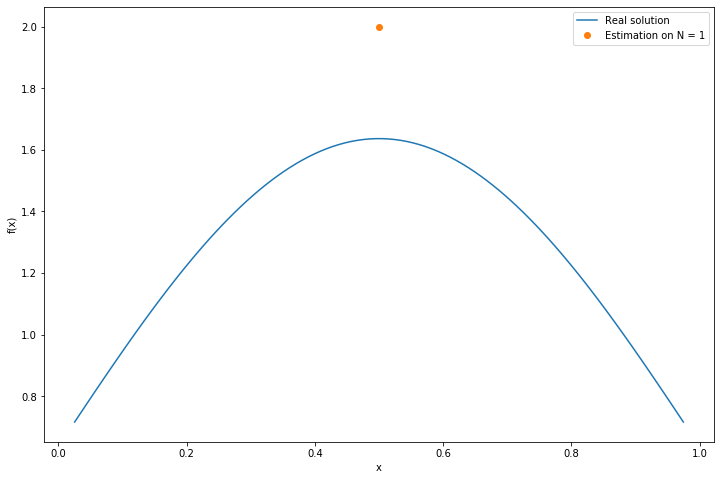

Point-to-point error: 0.0288913421


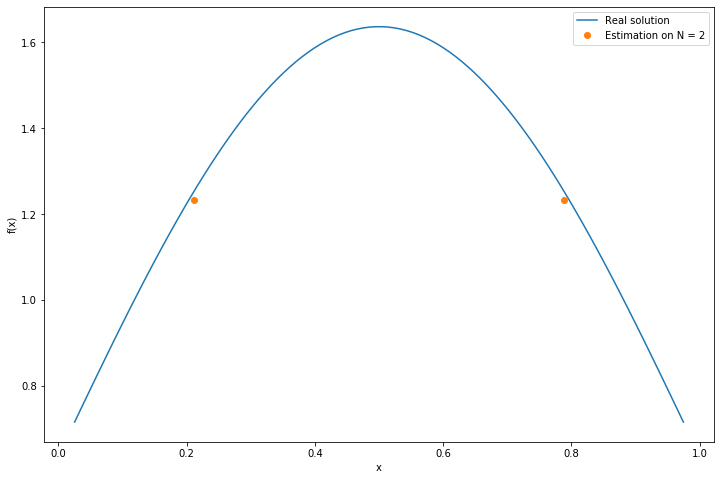

Point-to-point error: 0.0007657482


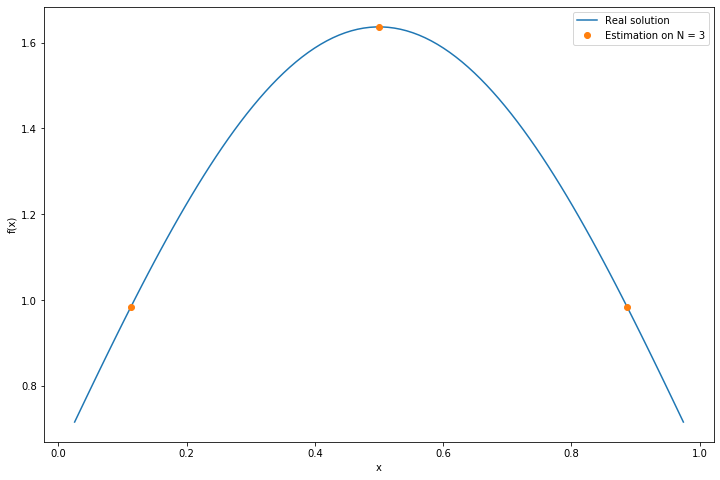

Point-to-point error: 0.0000100405


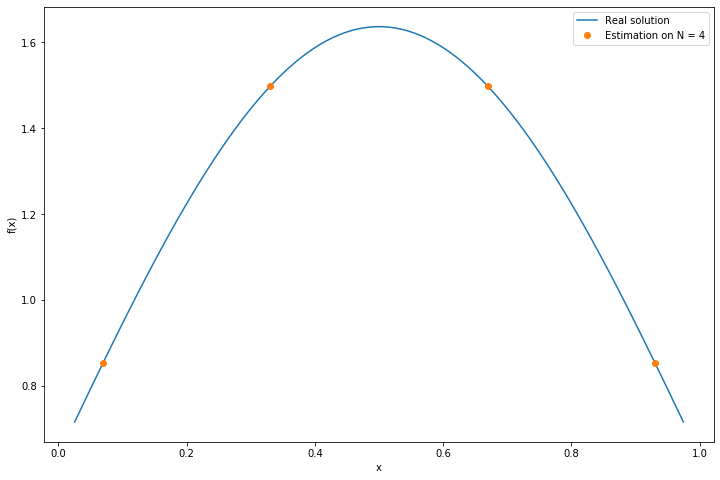

Point-to-point error: 0.0000000785


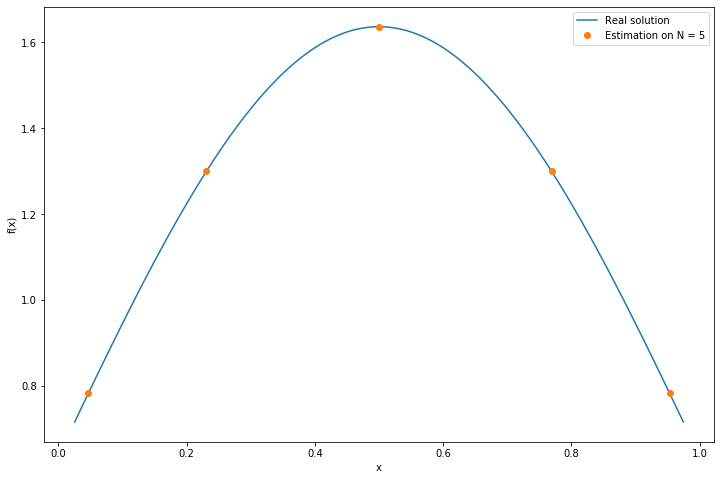

Point-to-point error: 0.0000000004


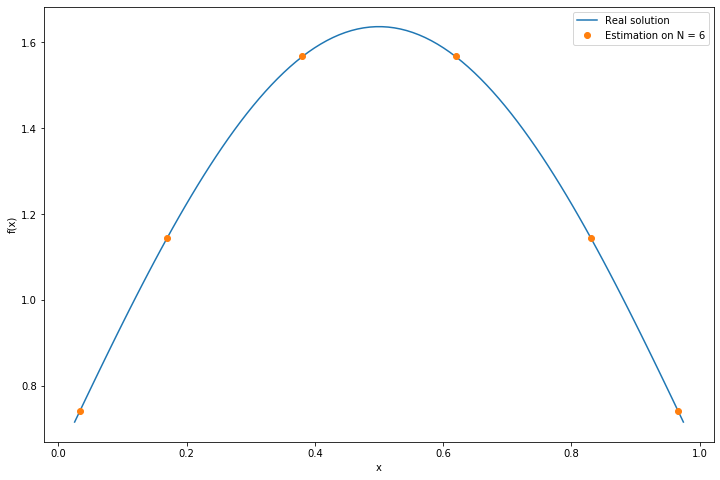

Point-to-point error: 0.0000000000


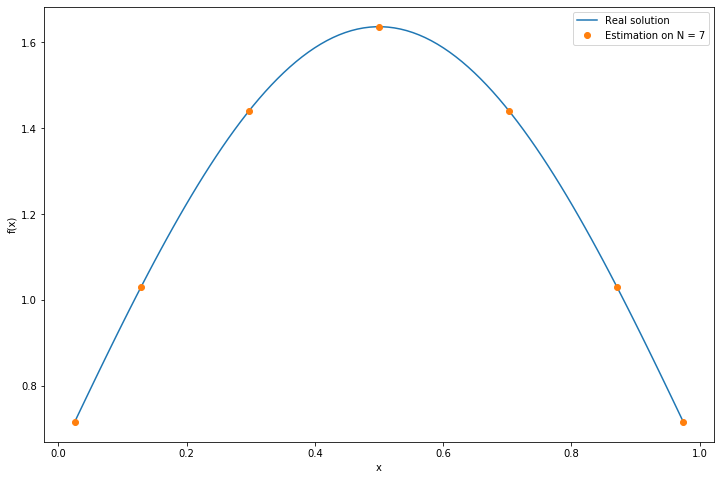

In [64]:
from scipy.special import roots_sh_legendre
import matplotlib.pyplot as plt

sol = lambda x: np.sin(np.pi * x) + 2 / np.pi
g = lambda x: np.sin(np.pi * x)
eps = 1e-10
N = 1
res = []
point_error = []
nodes_array = []
accuracy = False
while ~accuracy:
    nodes, weights = roots_sh_legendre(N)
    int_matrix = np.empty([N, N])
    int_matrix[:] = weights
    M = np.eye(N) - 0.5 * int_matrix
    res.append(np.linalg.solve(M, g(nodes)))
    nodes_array.append(nodes)
    point_error.append(np.linalg.norm(sol(nodes) - res[-1]))
    accuracy = (point_error[-1] < eps)
    N += 1

x_lin = np.linspace(min(nodes_array[-1]), max(nodes_array[-1]), 100)
for i in range(len(res)):
    plt.figure(figsize=(12,8))
    plt.plot(x_lin, sol(x_lin), '-', label='Real solution')
    plt.plot(nodes_array[i], res[i], 'o', label='Estimation on N = %i' % (i + 1))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    print('Point-to-point error: %.10f' % point_error[i])
    plt.show()

### Task 2.2
(20% of the grade)

An obvious issue with the privious result for $f(x)$ that it returns the solution on a fixed set of points. We do not control precise positions of these points.

1. First, let's try to interpolate the values obtained in the previous task to a uniform grid of length 50. You may use any interpolation method. Compare the interpolation values with exact solution values.

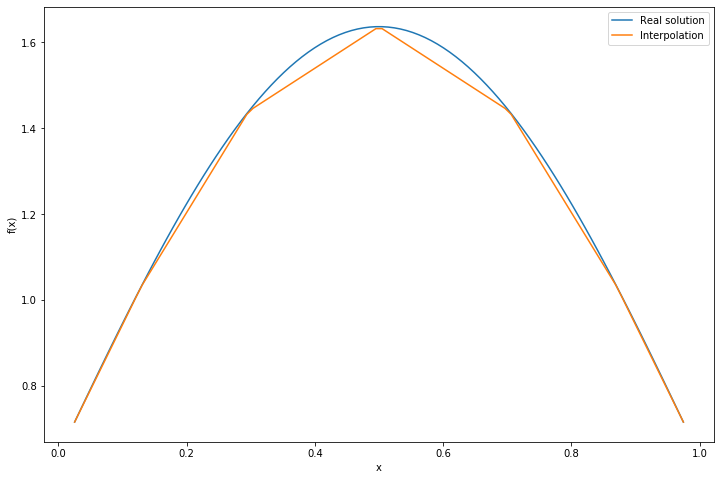

Absolute error on a grid: 0.1727016376


In [68]:
from scipy.interpolate import interp1d
grid = np.linspace(min(nodes_array[-1]), max(nodes_array[-1]), 50)
f = interp1d(nodes_array[-1], res[-1])

plt.figure(figsize=(12,8))
plt.plot(x_lin, sol(x_lin), '-', label='Real solution')
plt.plot(x_lin, f(x_lin), '-', label='Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
print('Absolute error of interpolation on a grid: %.10f' % np.linalg.norm(f(grid) - sol(grid)))

2. Now use the following formula to calculate the function at points of the same uniform grid.
$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$
Again, compare the interpolation values with the exact solution values, and also with the direct interpolation method.

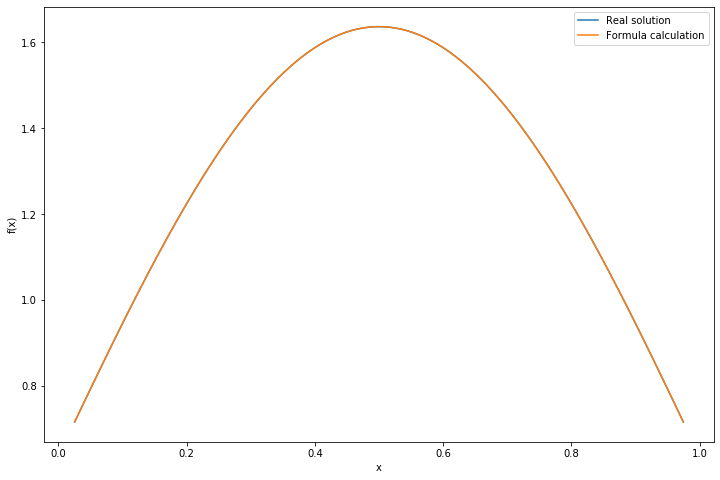

Absolute error of interpolation on a grid: 0.0000000000


In [74]:
N = len(res)
nodes, weights = roots_sh_legendre(N)
f = lambda x: g(x) + 0.5 * weights @ res[-1]

plt.figure(figsize=(12,8))
plt.plot(x_lin, sol(x_lin), '-', label='Real solution')
plt.plot(x_lin, f(x_lin), '-', label='Formula calculation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
print('Absolute error of interpolation on a grid: %.10f' % np.linalg.norm(f(grid) - sol(grid)))